Code Source:

https://docs.microsoft.com/en-us/python/api/overview/azure/cognitiveservices-vision-computervision-readme?view=azure-python

In [1]:
!pip install azure-cognitiveservices-vision-computervision

     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 


In [12]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import os
region = "eastus"
key = "AUTHKEY"

credentials = CognitiveServicesCredentials(key)
client = ComputerVisionClient(
    endpoint="https://" + region + ".api.cognitive.microsoft.com/",
    credentials=credentials
)

Images

In [7]:
from PIL import Image
import io
import requests
from io import BytesIO
import matplotlib.pyplot as plt


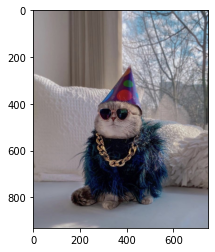

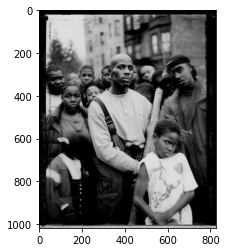

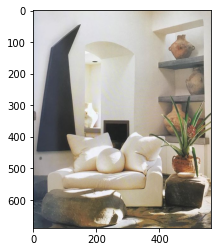

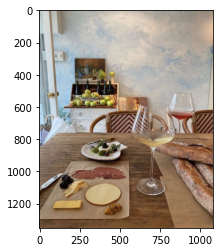

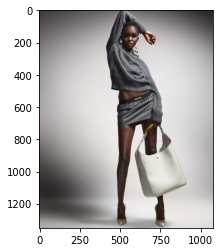

In [18]:
url1 = "https://64.media.tumblr.com/36aa60130ec3b8646c58b19514d22085/a5e5be1f357321e1-31/s1280x1920/8524b2651365c50e2189ca7665d127a1cf29488c.jpg"
url2 = "https://64.media.tumblr.com/b165e9ba19410762779f32d0973916bd/87bf0a5167fbc6ca-02/s1280x1920/eb9260ee6bddab263514494d6127c10525d8263e.jpg" 
url3 = "https://64.media.tumblr.com/118acd4eb72ebbddd7ad0f1aaa928a47/tumblr_panbw9S2fR1r9ij87o1_640.jpg"
url4 = "https://64.media.tumblr.com/45296d749588c4604b899dd538c68d2e/8dc04dda76fac52b-c2/s1280x1920/8a114564b2db6204cfb7afed9751cd5ca4bb5ced.jpg"
url5 = "https://64.media.tumblr.com/1b143513931635fd0cba25f11a5db91a/cc0e653975208ae7-ed/s1280x1920/36536846c9136a079e419da48ecda294dc5d42a2.jpg"

images = [url1, url2, url3, url4, url5]

for url in images:
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.show()

def showimg(url):
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.show()

Analyze Images

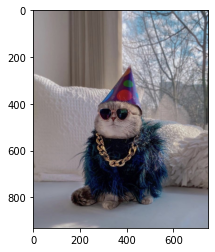

toy 88.45
snow 86.21
blue 70.44
hat 64.05
winter 61.83
indoor 59.81


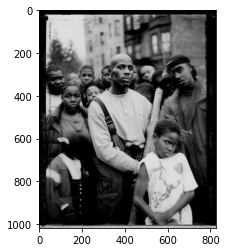

clothing 99.87
human face 99.5
person 99.2
boy 94.29
toddler 93.85
smile 91.78
baby 91.77
outdoor 89.98
girl 88.64
black and white 87.98
photographic paper 86.84
photograph 86.16
child 60.36
people 57.78


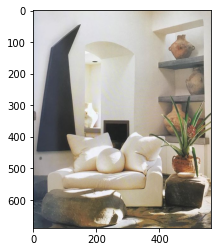

wall 98.83
indoor 98.65
vase 98.6
interior design 95.78
houseplant 95.21
furniture 94.68
flowerpot 91.85
pillow 90.45
couch 90.02
coffee table 89.73
studio couch 89.23
sofa bed 86.12
lamp 85.73
living room 85.71
lampshade 84.95
room 82.43
plant 55.02
art 48.85
design 48.39


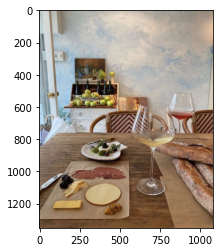

indoor 98.11
tableware 97.06
wall 95.98
platter 93.95
furniture 93.89
plate 92.32
coffee table 87.55
wine glass 86.58
food 82.86
wine 75.4
floor 72.71
table 64.06


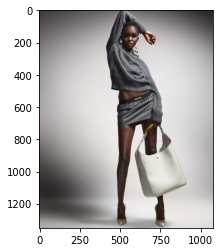

footwear 96.89
clothing 95.35
high heels 93.47
fashion design 90.7
fashion model 90.28
fashion 90.21
human face 89.67
person 89.32
woman 87.18
cloak 64.02


In [19]:
for url in images:
  showimg(url)
  image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.tags])

  for tag in image_analysis.tags:
      print(tag.name, round(tag.confidence*100, ndigits=2))
  

Textual description of image

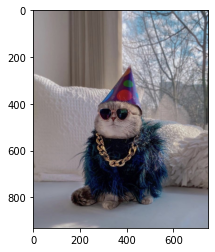

a cat wearing a party hat and sunglasses
0.5498743653297424


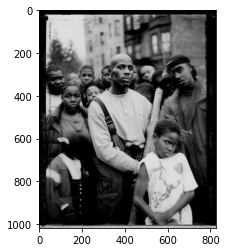

DMX et al.
0.4249344766139984


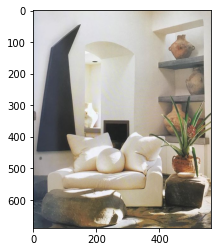

a living room with a white couch and a black shelf with white pillows
0.2866753041744232


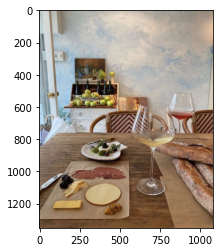

a table with food and wine
0.43758425116539


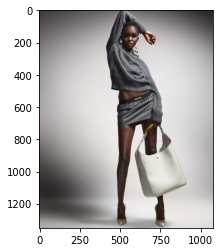

a person wearing a grey dress and a white bag
0.32889214158058167


In [20]:
language = "en"
max_descriptions = 3

for url in images:
  showimg(url)
  analysis = client.describe_image(url, max_descriptions, language)

  for caption in analysis.captions:
      print(caption.text)
      print(caption.confidence)

Generate Thumbnail

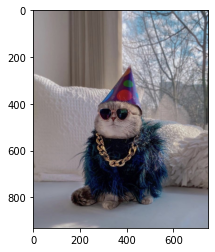

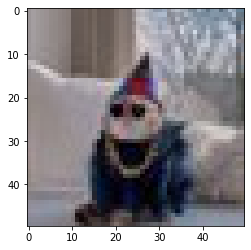

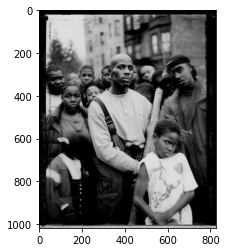

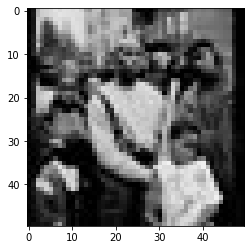

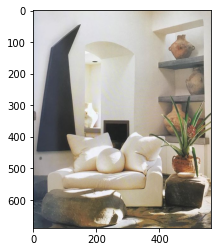

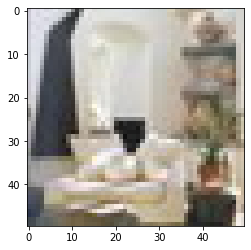

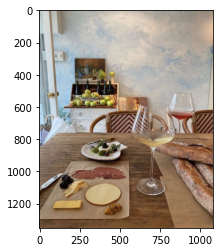

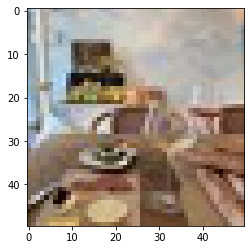

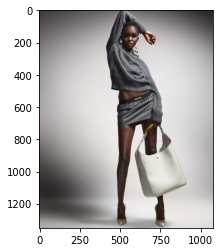

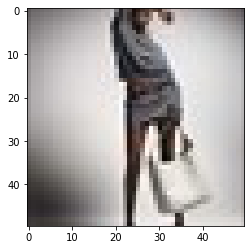

In [23]:
width = 50
height = 50

for url in images:
  showimg(url)
  thumbnail = client.generate_thumbnail(width, height, url)
  for x in thumbnail:
    image = Image.open(io.BytesIO(x))
    plt.imshow(image)
    plt.show()